<a href="https://colab.research.google.com/github/munyanza/car_price_predction/blob/main/sport_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the necessary libraries
import pandas as pd

# Seaborn and Matplotlib for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit Learn for model creation
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score

# Algorithms for data training
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression

# Save our model
import joblib

In [90]:
# Load the dataset
df = pd.read_csv('/content/Sport car price.csv')

In [91]:
# First 5 rows
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [92]:
# Number of rows and columns
df.shape

(1007, 8)

In [93]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [94]:
# Check the missing values
df.isnull().sum()

,0
Car Make,0
Car Model,0
Year,0
Engine Size (L),10
Horsepower,0
Torque (lb-ft),3
0-60 MPH Time (seconds),0
Price (in USD),0


Text(0.5, 0, 'Car Make')

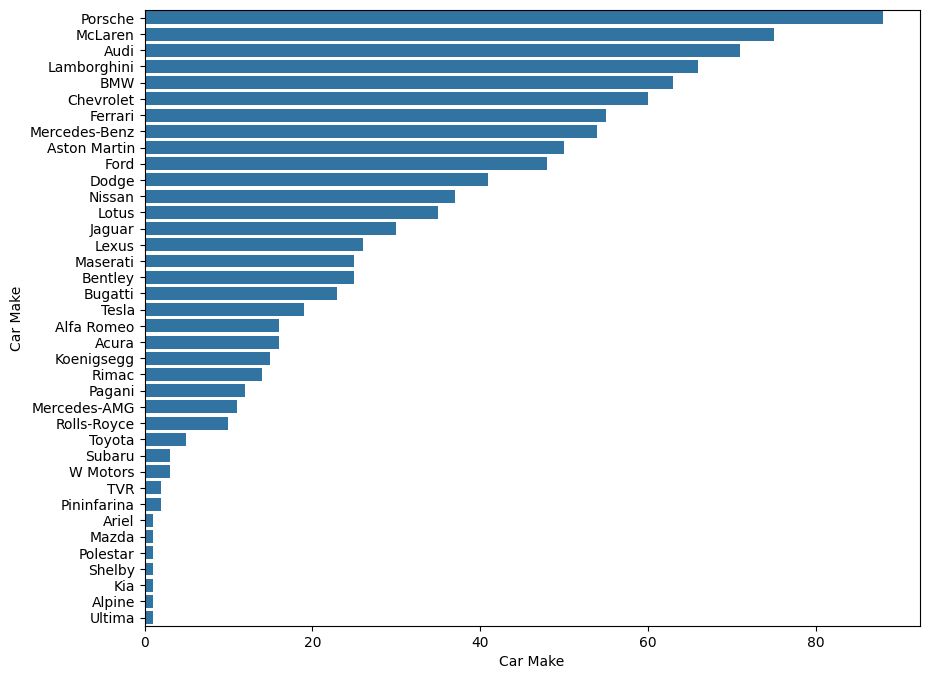

In [95]:
# Car Make count
plt.figure(figsize=(10,8))
sns.countplot(y='Car Make', data=df, order = df['Car Make'].value_counts().index)
plt.xlabel('Car Make')

<Axes: xlabel='count', ylabel='Year'>

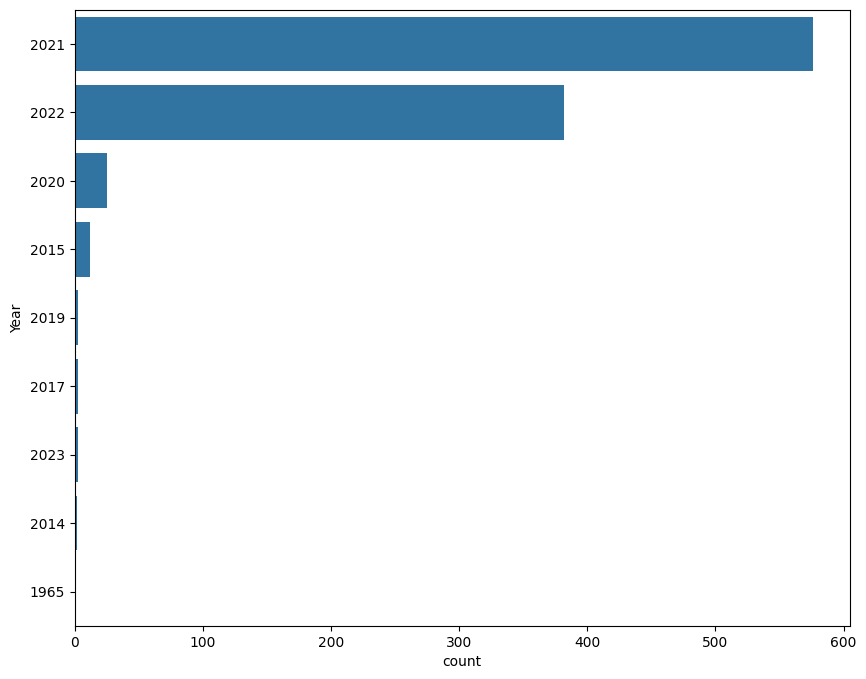

In [96]:
# Count plot for the year
plt.figure(figsize=(10,8))
sns.countplot(y='Year',data=df,order = df['Year'].value_counts().index)

In [97]:
# Separate the data into features (X) and target (y)
X = df.drop(['Price (in USD)'],axis=1)
y = df['Price (in USD)']

# Clean and convert the target variable to numeric
y = y.str.replace(',', '').astype(float)

In [98]:
# Seperate the columns into categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

print('Categorical Columns:\n ',categorical_cols)
print('\nNumerical Columns: \n',numerical_cols)

Categorical Columns:
  Index(['Car Make', 'Car Model', 'Engine Size (L)', 'Horsepower',
       'Torque (lb-ft)', '0-60 MPH Time (seconds)'],
      dtype='object')

Numerical Columns: 
 Index(['Year'], dtype='object')


In [99]:
# Transform the columns
categorical_transformer = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])
numerical_transformer = Pipeline(steps=[
    ('scale',StandardScaler()),
])

In [100]:
# Preprocess the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',categorical_transformer,categorical_cols),
        ('num',numerical_transformer,numerical_cols)
    ])

In [101]:
# Covert the X to preprocessor
X_preprocessed = preprocessor.fit_transform(X)

In [102]:
# Convert the X and y to train and test
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed,y,test_size=0.2,random_state=42)

In [103]:
# Train our model
model = {
    'KNeighbors':KNeighborsRegressor(),
    'Tree':DecisionTreeRegressor(),
    'Xgboost':XGBRegressor(),

}

for name,regressor in model.items():
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  cv_score = cross_val_score(regressor, X_train, y_train, cv=5)

  print(f'{name} cross-validation score: {cv_score.mean()*100:.2f}')

KNeighbors cross-validation score: 91.84
Tree cross-validation score: 81.92
Xgboost cross-validation score: 89.76


In [104]:
# Save the model
best_model = model['KNeighbors']
joblib.dump(best_model, 'Sport_car_prediction_model.pkl')
print('The model was saved successfully!')

The model was saved successfully!
